In [0]:
!wget https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip

--2020-04-23 07:12:08--  https://fmi-unibuc-ia.github.io/ia/Data/data_MNIST.zip
Resolving fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)... 185.199.111.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fmi-unibuc-ia.github.io (fmi-unibuc-ia.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 629644 (615K) [application/zip]
Saving to: ‘data_MNIST.zip’

data_MNIST.zip      100%[===================>] 614.89K  --.-KB/s    in 0.06s   

2020-04-23 07:12:09 (9.30 MB/s) - ‘data_MNIST.zip’ saved [629644/629644]



In [0]:
!unzip data_MNIST.zip

Archive:  data_MNIST.zip
  inflating: data/test_images.txt    
  inflating: data/test_labels.txt    
  inflating: data/train_images.txt   
  inflating: data/train_labels.txt   


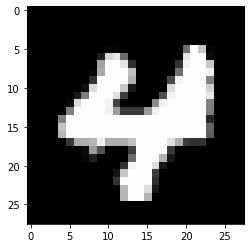

In [0]:
import numpy as np
import matplotlib.pyplot as plt

train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt').astype(int)
test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt').astype(int)

image = train_images[0, :]
image = np.reshape(image, (28, 28))

plt.imshow(image.astype(np.uint8), cmap='gray')
plt.show()

In [0]:
2. Știind că valoarea minimă a unui pixel este 0, iar valoarea maximă este 255,
calculați capetele a num_bins intervale (utilizați funcția linspace). Definiți
metoda values_to_bins care primește o matrice de dimensiune (n_samples,
n_features) și capetele intervalelor calculate anterior, iar pentru fiecare 

exemplu și fiecare atribut calculează indexul intervalului corespunzător
(utilizați funcția np.digitize).
Folosiți funcția definită pentru a discretiza mulțimea de antrenare și cea de
testare.

In [0]:
def values_to_bins(X, num_bins):
    bins = np.linspace(start=0, stop=255, num=num_bins)
    return np.digitize(X, bins) 

values_to_bins(train_images, 5).mean()

1.3956326530612244

In [0]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

X_train = values_to_bins(train_images, 5)
X_test = values_to_bins(test_images, 5)

clf.fit(X_train, train_labels)

clf.score(X_test, test_labels)

0.806

In [0]:
for num_bins in [3, 5, 7, 9, 11]:
    clf = MultinomialNB()

    X_train = values_to_bins(train_images, num_bins)
    X_test = values_to_bins(test_images, num_bins)

    clf.fit(X_train, train_labels)

    accuracy = clf.score(X_test, test_labels)
    
    print(num_bins, accuracy)

3 0.802
5 0.806
7 0.81
9 0.81
11 0.814


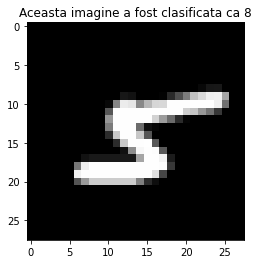

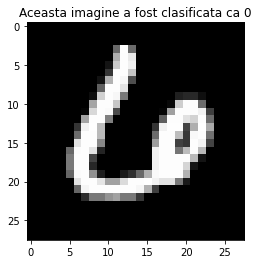

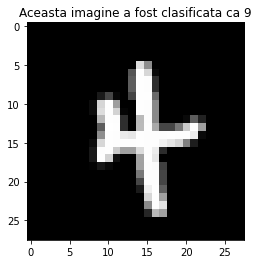

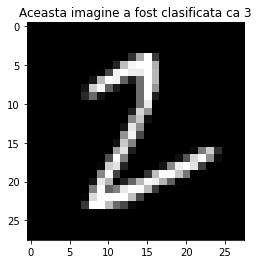

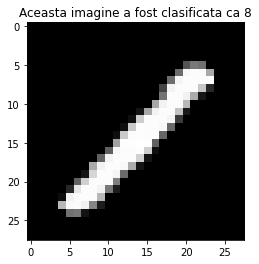

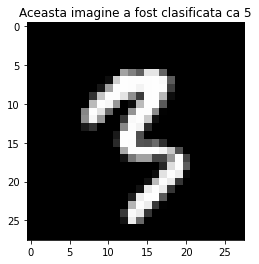

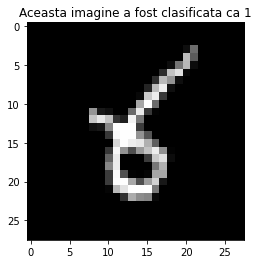

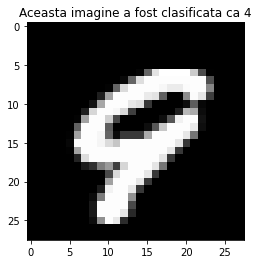

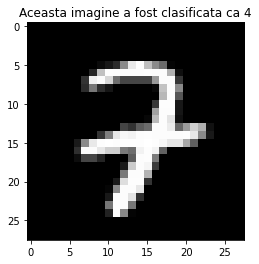

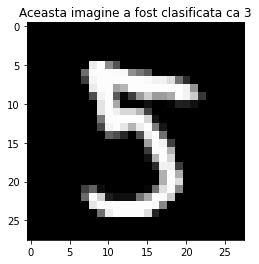

In [0]:
clf = MultinomialNB()

X_train = values_to_bins(train_images, 11)
X_test = values_to_bins(test_images, 11)

clf.fit(X_train, train_labels)
pred_labels = clf.predict(X_test)

wrongs = np.argwhere(pred_labels != test_labels)
for index in wrongs[:10]:
    image = test_images[index, :]
    image = np.reshape(image, (28, 28))

    plt.title("Aceasta imagine a fost clasificata ca " + str(pred_labels[index][0]))
    plt.imshow(image.astype(np.uint8), cmap='gray')
    plt.show()

In [0]:
def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    
    return [[np.sum((y_true == row) & (y_pred == column))
             for column in range(num_classes)
             ] for row in range(num_classes)]

confusion_matrix(test_labels, pred_labels)

[[49, 0, 0, 0, 0, 0, 3, 0, 1, 0],
 [0, 49, 0, 0, 0, 0, 0, 0, 3, 0],
 [2, 4, 43, 2, 2, 0, 3, 1, 1, 0],
 [0, 0, 1, 49, 0, 1, 0, 0, 0, 2],
 [0, 0, 0, 0, 36, 0, 0, 0, 1, 9],
 [1, 1, 2, 9, 0, 32, 0, 0, 5, 2],
 [2, 3, 0, 0, 1, 0, 41, 0, 1, 0],
 [1, 2, 0, 0, 1, 0, 0, 41, 0, 5],
 [0, 1, 2, 4, 0, 2, 1, 1, 34, 1],
 [0, 0, 0, 1, 7, 0, 0, 0, 1, 33]]